# Regularization in Neural Network keyboard

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models,regularizers
import matplotlib.pyplot as plt
import numpy as np

# 1. Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten 28x28 images into vectors of size 784
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [ ]:
from ast import mod
import tensorflow as tf
from tensorflow.keras import layers, models,regularizers

# function to build MLP with specific regularization
def build_mlp(reg_type=None,reg_value=0.001,dropout_rate=0.0):
  if reg_type=='l1':
    kernal_reg=regularizers.l1(reg_value)
  elif reg_type=='l2':
    kernal_reg=regularizers.l2(reg_value)
  else:
    kernal_reg=None
  model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu',kernel_regularizer=kernal_reg),
    layers.Dropout(dropout_rate),
    layers.Dense(64, activation='relu',kernel_regularizer=kernal_reg),
    layers.Dropout(dropout_rate),
    layers.Dense(10, activation='softmax')
    ])
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [ ]:
#3 configuration to test
configs=[
    {'reg_type':None,'reg_value':0.0,'dropout_rate':0.0},
    {'reg_type':'l1','reg_value':0.001,'dropout_rate':0.0},
    {'reg_type':'l2','reg_value':0.001,'dropout_rate':0.0},
    {'reg_type':None,'reg_value':0.0,'dropout_rate':0.3},
    {'reg_type':'l1','reg_value':0.0001,'dropout_rate':0.3},

    ]
history_results={}
test_results={}

In [ ]:
for cfg in configs:
    print(f"Training MLP with config: {cfg}")
    model = build_mlp(cfg['reg_type'], cfg['reg_value'], cfg['dropout_rate'])
    history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=1)
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
    test_results[str(cfg)] = test_acc
    history_results[str(cfg)] = history.history  # <-- Save history here
    print(f"Test Accuracy: {test_acc}")

Training MLP with config: {'reg_type': None, 'reg_value': 0.0, 'dropout_rate': 0.0}
Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8259 - loss: 0.5926 - val_accuracy: 0.9550 - val_loss: 0.1619
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9601 - loss: 0.1381 - val_accuracy: 0.9626 - val_loss: 0.1233
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9738 - loss: 0.0873 - val_accuracy: 0.9693 - val_loss: 0.1030
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9801 - loss: 0.0648 - val_accuracy: 0.9679 - val_loss: 0.1056
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9840 - loss: 0.0516 - val_accuracy: 0.9734 - val_loss: 0.0907
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9696 - loss: 0.0936
Test Accuracy: 0.9740999937057495
Training MLP with config: {'reg_type': 'l1', 'reg_value': 0.001, 'dropout_rate': 0.0}
Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8199 - loss: 2.4362 

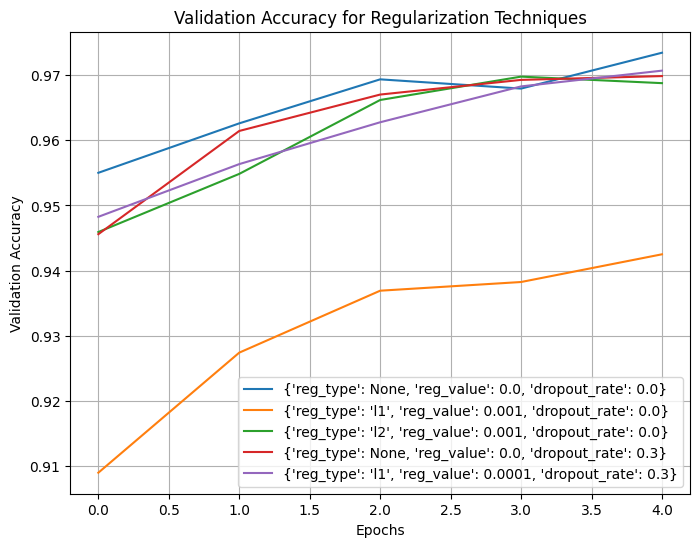

In [ ]:
#5 plot Validation Accuracy Curves
plt.figure(figsize=(8,6))
for cfg, hist in history_results.items():
  plt.plot(hist['val_accuracy'],label=cfg)
plt.title('Validation Accuracy for Regularization Techniques')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


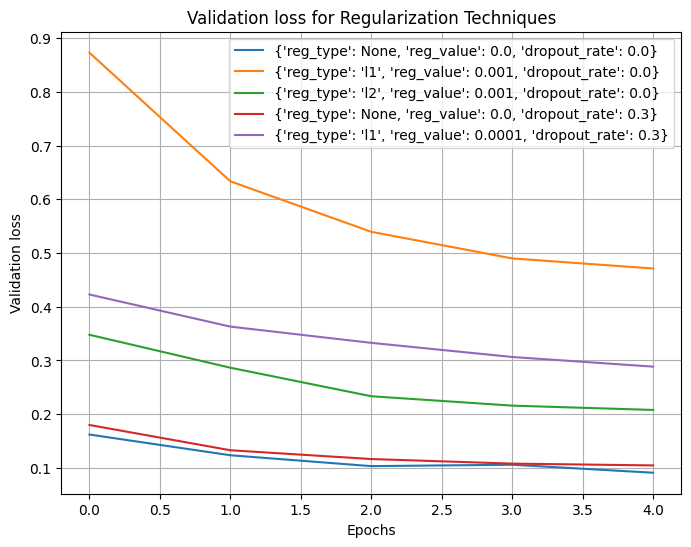

In [ ]:
#5 plot Validation loss Curves
plt.figure(figsize=(8,6))
for cfg, hist in history_results.items():
  plt.plot(hist['val_loss'],label=cfg)
plt.title('Validation loss for Regularization Techniques')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.grid(True)
plt.show()
